In [21]:
# Importing necessary modules from keras for building the model
from tensorflow.keras import layers
from tensorflow.keras import models


In [2]:
# Importing the CIFAR-10 dataset
from keras.datasets import cifar10

In [3]:
# Loading the CIFAR-10 dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [4]:
# Displaying the label of the second image in the training set
print(trainy[1])


[9]


In [5]:
# Cloning a GitHub repository containing AI datasets
!git clone https://github.com/sam360digitmg/AI-Datasets.git


Cloning into 'AI-Datasets'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 0), reused 3 (delta 0), pack-reused 29
Receiving objects: 100% (33/33), 200.94 MiB | 30.34 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Updating files: 100% (7/7), done.


In [6]:
# Extracting the contents of a zip file from the cloned repository
from zipfile import ZipFile
file_name = "/content/AI-Datasets/CNN/Animals.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')


Done


In [7]:
# Setting up directories for training, validation, and test datasets
base_dir = 'cats and dogs small'
train_dir = 'cats and dogs small/train'
validation_dir = 'cats and dogs small/validation'
test_dir = 'cats and dogs small/test'
train_cats_dir = 'cats and dogs small/train/cats'
train_dogs_dir = 'cats and dogs small/train/dogs'
validation_cats_dir = 'cats and dogs small/validation/cats'
validation_dogs_dir = 'cats and dogs small/validation/dogs'
test_cats_dir = 'cats and dogs small/test/cats'
test_dogs_dir = 'cats and dogs small/test/dogs'


In [9]:
import os

In [10]:
# Counting the number of images in each directory
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1002
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [11]:
# Importing necessary modules from keras for building the model
from tensorflow.keras import layers
from tensorflow.keras import models


In [12]:
# Initializing a sequential model
model = models.Sequential()


In [13]:
# Adding a 2D convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation function.
# This is the first layer so we specify the input shape which is (150, 150, 3), indicating
# the images are 150x150 pixels with 3 channels (RGB).
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))


In [14]:
# Adding a max pooling layer to reduce the spatial dimensions of the output volume.
model.add(layers.MaxPooling2D((2, 2)))


In [15]:
# Adding another convolutional layer with 64 filters to learn more complex features.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adding another max pooling layer for dimensionality reduction.
model.add(layers.MaxPooling2D((2, 2)))

# Adding a third convolutional layer with 128 filters for even more complex feature learning.
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Adding another max pooling layer.
model.add(layers.MaxPooling2D((2, 2)))

# Adding a fourth convolutional layer with 128 filters, continuing the pattern of increasing complexity.
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Adding the final max pooling layer.
model.add(layers.MaxPooling2D((2, 2)))

# Flattening the 3D outputs to 1D before feeding them into the densely connected layers.
model.add(layers.Flatten())

# Adding a dense layer with 512 units and ReLU activation for learning non-linear combinations of the high-level features extracted by the convolutional layers.
model.add(layers.Dense(512, activation='relu'))

# Adding the output layer with a single unit and a sigmoid activation function to classify the images into one of the two categories (cats or dogs).
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
# Displaying the model's architecture to review the layers and parameters.
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [24]:
# Compiling the model specifies the loss function, optimizer, and metrics to monitor.
# Here we use binary crossentropy as the loss function, suitable for binary classification problems.
# The RMSprop optimizer is used with a learning rate of 1e-4. Accuracy is the metric for evaluation.
model.compile(loss='binary_crossentropy', optimizer= optimizers.RMSprop(lr=1e-4), metrics=['acc'])


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Setting up image data generators for augmenting training and validation images.
# Data augmentation is a strategy to increase the diversity of the training set by applying random transformations.
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

# For validation data, we only rescale the images to match the model's expected input.
# Note: Data augmentation is not applied to validation data.
test_datagen = ImageDataGenerator(rescale=1./255)


In [27]:
# Preparing the training and validation generators by specifying paths, target sizes, batch sizes, and the classification mode as binary for our two-class problem.
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

# Training the model using the fit_generator method. This method is suitable for handling data generated by a Python generator, as is the case with our data augmentation setup.
# The model will train for 30 epochs, with steps per epoch and validation steps determined by the batch size and dataset size.
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

# Saving the trained model to disk, allowing us to load it later without needing to retrain.
model.save('cats_and_dogs_small_1.h5')


Found 2002 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<ipython-input-27-373a3968e68e>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)


Epoch 1/30
100/100 [==============================] - 119s 1s/step - loss: 0.7111 - acc: 0.5131 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 114s 1s/step - loss: 0.6925 - acc: 0.5232 - val_loss: 0.6913 - val_acc: 0.5040
Epoch 3/30
100/100 [==============================] - 106s 1s/step - loss: 0.6880 - acc: 0.5353 - val_loss: 0.6738 - val_acc: 0.5880
Epoch 4/30
100/100 [==============================] - 113s 1s/step - loss: 0.6830 - acc: 0.5600 - val_loss: 0.6638 - val_acc: 0.6220
Epoch 5/30
100/100 [==============================] - 107s 1s/step - loss: 0.6741 - acc: 0.5938 - val_loss: 0.6793 - val_acc: 0.5490
Epoch 6/30
100/100 [==============================] - 114s 1s/step - loss: 0.6603 - acc: 0.6090 - val_loss: 0.6141 - val_acc: 0.6690
Epoch 7/30
100/100 [==============================] - 113s 1s/step - loss: 0.6539 - acc: 0.6105 - val_loss: 0.6299 - val_acc: 0.6260
Epoch 8/30
100/100 [==============================] - 106s 1s/step - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


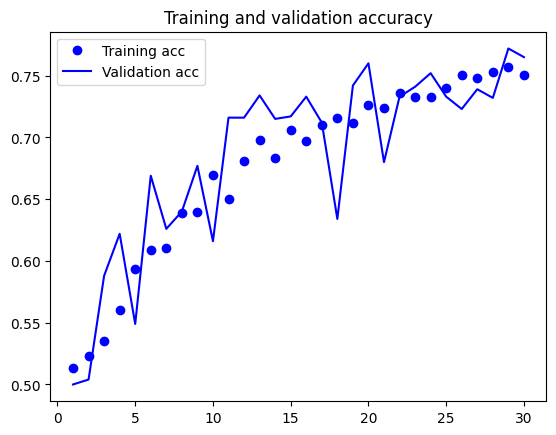

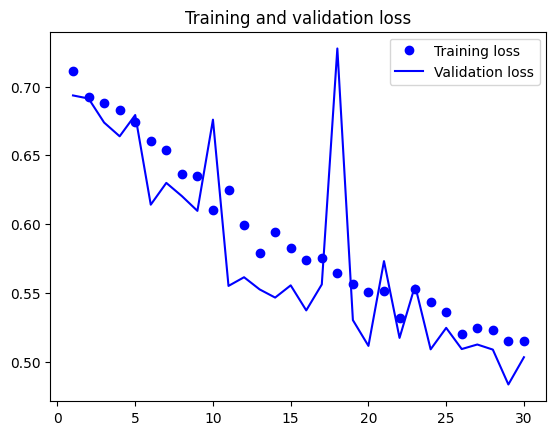

In [28]:
# Plotting the training and validation accuracy and loss over epochs to visualize the learning process.
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# Plotting training and validation loss
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [31]:
# Further demonstrating data augmentation by visualizing how random transformations are applied to a sample image.
# This code selects a single image and generates batches of transformed images, which are then plotted.

# Selecting a single image path from the training set.
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]  # Choosing one image to augment.

# Loading the selected image and resizing it to 150x150 pixels.
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)  # Converting the image to a numpy array.
x = x.reshape((1,) + x.shape)  # Reshaping the image to (1, 150, 150, 3) to fit the model's expected input.

# Generating batches of randomly transformed images.
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()


NameError: name 'image' is not defined

In [32]:
# Leveraging a pretrained model (VGG16) trained on ImageNet to improve the performance of our model on the dataset.
from tensorflow.keras.applications import VGG16

# Loading the VGG16 model pretrained weights, excluding the top (fully connected) layers.
# include_top=False means we do not include the densely connected classifier on top; only the convolutional base.
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


58889256/58889256 [==============================] - 1s 0us/step


In [33]:
# Displaying the architecture of the convolutional base.
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [34]:
# Freezing the convolutional base before compiling and training the model to prevent the pretrained weights from being updated during training.
conv_base.trainable = False



In [35]:
# Adding the VGG16 base to our model and adding a new classifier on top.
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())  # Flattening the output layer to feed it into the fully connected layers.
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Classifier layer for binary classification.



In [36]:
# Displaying the new model summary to verify the architecture.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [37]:
# Compiling and training the model as before, using binary_crossentropy loss and the RMSprop optimizer.
# The model is then evaluated on a test set to assess its performance.

# After adding a new classifier on top of the conv_base, we'll now fine-tune the model.
# Fine-tuning involves unfreezing a few of the top layers of a frozen model base and jointly training both the newly added part of the model (in this case, the fully connected classifier) and these top layers.

# First, we'll make the convolutional base trainable.
conv_base.trainable = True

In [38]:
# Specifying the number of layers to freeze. Layers before this will not be trained.
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':  # This is the first layer we want to train.
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
# Using a very low learning rate to limit the magnitude of modifications to the representations of the three blocks being fine-tuned.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

# Continuing the training process. Now, the fine-tuning of the last convolutional block of VGG16 along with the classifier will occur.
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=50)


<ipython-input-40-f9b733eae397>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
 15/100 [===>..........................] - ETA: 7:48 - loss: 3.6590 - acc: 0.5067

In [ ]:
# To make it easier to see trends, we apply a smoothing function to the plots of training/validation accuracy and loss.

def smooth_curve(points, factor=0.8):
    """A simple utility function to smooth the plots by applying exponential moving average to the data points."""
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Smoothing the accuracy and loss plots.
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# To evaluate the final model's performance, we use our test dataset, which the model has never seen during training or validation.

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# Evaluating the model on the test set.
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)


In [ ]:
# Understanding how a model internally represents the input data can give insights into how the model "sees" the world.
# We will visualize the activations of the different layers of our model.

from tensorflow.keras.models import load_model
model = load_model('cats_and_dogs_small_1.h5')  # Loading the saved model.

# Preprocessing a single image.
img_path = os.path.join(test_cats_dir, 'cat.1510.jpg')
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)  # Image tensor with shape (1, 150, 150, 3).
img_tensor /= 255.  # Remember that the model was trained on inputs that were normalized.

# Displaying the test image.
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
# Extracting the outputs of the top 8 layers.
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creating a model that will return these outputs, given the model input.
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# When fed an image input, this model returns the values of the layer activations.
activations = activation_model.predict(img_tensor)

# Visualizing the fourth channel of the first activation.
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

# Looping over the layers to visualize every channel in every intermediate activation.
for layer_name, layer_activation in zip(layer_names, activations):  # Names of the layers, so you can have them as part of your plot.
    n_features = layer_activation.shape[-1]  # Number of features in the feature map.
    size = layer_activation.shape[1]  #The feature map has shape (1, size, size, n_features).

    # Tiles the activation channels in this matrix.
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]

            # Processing the feature to make it visually palatable.
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    # Displaying the grid.
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')